In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("raytune_results_0.csv")
df.head()

,Unnamed: 0,train_mean_loss,train_accuracy,train_f1_score,val_mean_loss,val_accuracy,val_f1_score,val_confusion_matrix,timestamp,checkpoint_dir_name,...,hostname,node_ip,time_since_restore,iterations_since_restore,config/max_seconds_length,config/dropout,config/coraa_filter_func,config/learning_rate,config/model_architecture,logdir
0,0,2.648044,0.473913,0.477698,0.693371,0.469565,0.630303,"[[4, 117], [5, 104]]",1725510936,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,79.201088,30,10,0.861458,filter1,1.966266e-05,CnnMFCC,6da1b8bc
1,1,0.775645,0.484988,0.558416,0.687089,0.500000,0.643564,"[[7, 67], [5, 65]]",1725511003,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,63.232635,30,19,0.435546,filter2,2.593435e-07,CnnSpectrogram_v2,c45adb06
2,2,5.926509,0.523188,0.502269,0.693834,0.491304,0.000000,"[[113, 0], [117, 0]]",1725511084,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,78.629584,30,13,0.948447,filter1,5.307240e-06,CnnMFCC,6b805119
3,3,0.847626,0.518841,0.529745,0.738788,0.491304,0.380952,"[[77, 42], [75, 36]]",1725511182,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,94.284121,30,18,0.322649,filter1,3.518591e-06,CnnSpectrogram,9cf204cb
4,4,2.696366,0.521940,0.538976,1.662532,0.444444,0.569892,"[[11, 63], [17, 53]]",1725511192,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,7.743401,5,12,0.662482,filter2,6.071754e-03,CnnSpectrogram_v2,1425c982


(0.0, 1.0)

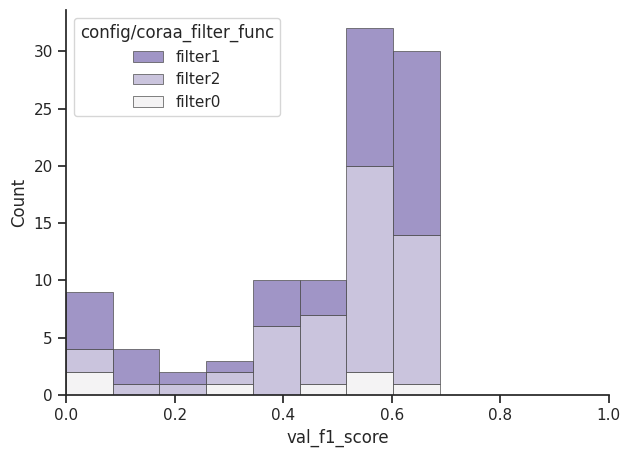

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="val_f1_score", hue="config/coraa_filter_func",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlim(0,1)

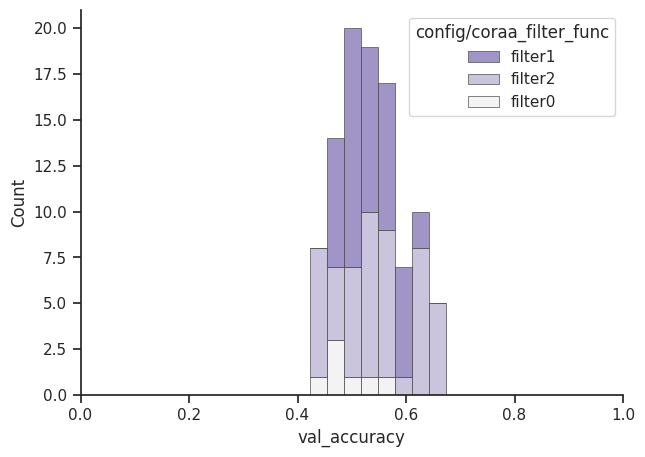

In [4]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="val_accuracy", hue="config/coraa_filter_func",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlim(0,1)
plt.show()

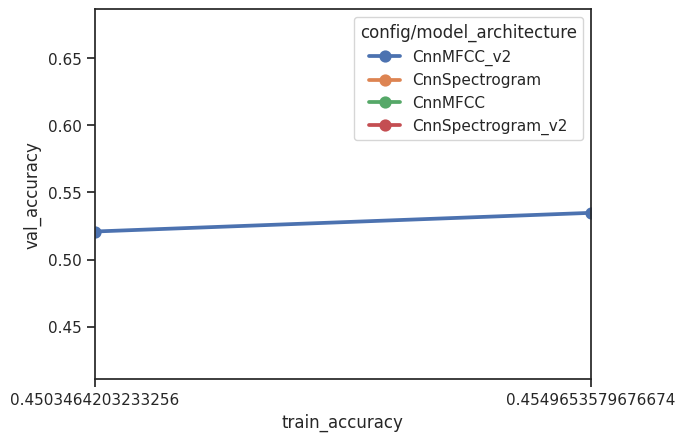

In [5]:


sns.pointplot(
    df,
    x="train_accuracy", hue="config/model_architecture",
    y="val_accuracy",
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlim(0,1)
plt.show()

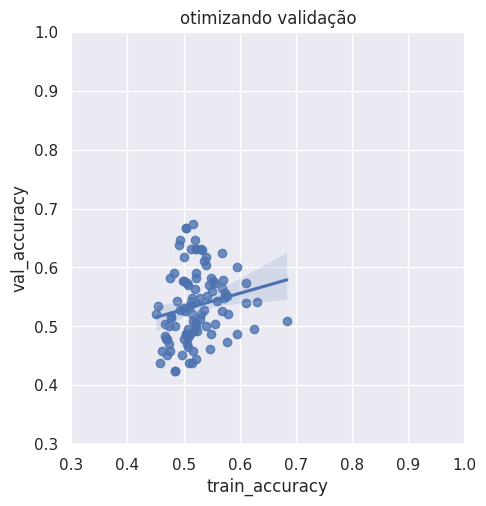

In [9]:
import seaborn as sns
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="train_accuracy", y="val_accuracy",
    height=5
)
g.set(title="otimizando validação", xlim=(0.3,1), ylim=(0.3,1))

# Use more informative axis labels than are provided by default

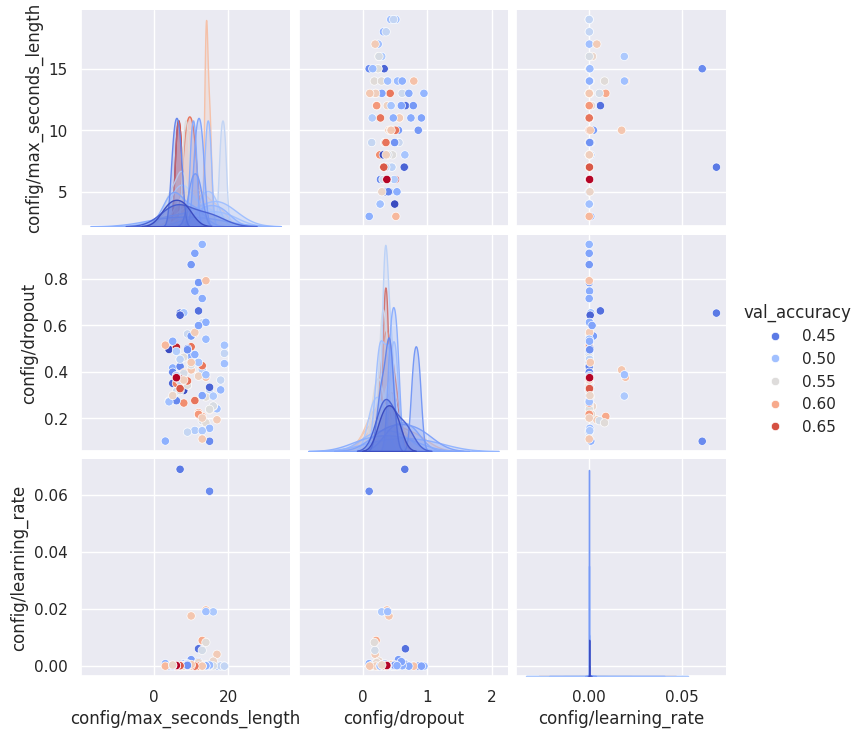

In [7]:
sns.pairplot(df[['val_accuracy', 'config/max_seconds_length', 'config/dropout','config/coraa_filter_func','config/learning_rate','config/model_architecture']], hue='val_accuracy', palette='coolwarm', diag_kind='kde')
plt.show()
